In [57]:
import json
from math import factorial
from itertools import combinations

import numpy as np
from matplotlib import pyplot as plt

In [45]:
def read_json(filepath):
    with open(filepath) as f:
        return json.load(f)

def c(n , r):
    return factorial(n) // (factorial(n - r) * factorial(r))

In [51]:
size = 3

graph = []
graph_life = []

size_range = range(size)
combs = [combination for count in size_range for combination in combinations(size_range, count+1)]
combination_size = len(combs)

for i in range(combination_size):
    graph.append(read_json(f'cache/graph_{i}.json'))
    graph_life.append(read_json(f'cache/graph_life_{i}.json'))

In [52]:
len(graph), combs

(7, [(0,), (1,), (2,), (0, 1), (0, 2), (1, 2), (0, 1, 2)])

In [83]:
i = 4
for key, life in graph_life[i].items():
    print(key, life)

cu [1.0, 11]
on [1.0, 11]
ut [1.0, 11]
n_ [0.9090909090909091, 11]
t1 [1.0, 10]
__ [1.0, 11]
1t [1.0, 10]
_o [1.0, 11]
t_ [0.45454545454545453, 11]
o3 [1.0, 1]
_~ [1.0, 3]
31 [0.6666666666666666, 6]
~~ [0.11764705882352941, 85]
12 [0.7142857142857143, 14]
23 [1.0, 10]
3c [1.0, 2]
~o [1.0, 10]
o8 [1.0, 2]
81 [0.5714285714285714, 7]
34 [1.0, 9]
45 [1.0, 9]
56 [1.0, 9]
67 [1.0, 9]
78 [1.0, 10]
8c [1.0, 3]
o1 [1.0, 4]
_0 [1.0, 4]
1~ [0.8297872340425532, 47]
01 [0.5714285714285714, 7]
89 [1.0, 8]
91 [1.0, 8]
~0 [1.0, 11]
0c [1.0, 3]
o2 [0.25, 4]
_3 [1.0, 1]
2~ [0.7037037037037037, 27]
~1 [1.0, 8]
11 [1.0, 4]
~2 [1.0, 8]
21 [0.8, 5]
~3 [1.0, 7]
~4 [1.0, 6]
41 [1.0, 4]
~5 [1.0, 6]
51 [1.0, 4]
~6 [1.0, 6]
61 [0.8, 5]
~7 [1.0, 5]
71 [1.0, 4]
~8 [1.0, 5]
~9 [1.0, 4]
92 [1.0, 4]
02 [1.0, 4]
22 [1.0, 3]
_6 [1.0, 1]
32 [1.0, 2]
42 [1.0, 2]
52 [1.0, 2]
6c [1.0, 1]
_8 [1.0, 1]
62 [1.0, 1]
72 [1.0, 1]
_2 [1.0, 1]
2c [1.0, 1]
t7 [1.0, 1]
7t [1.0, 1]
07 [1.0, 1]


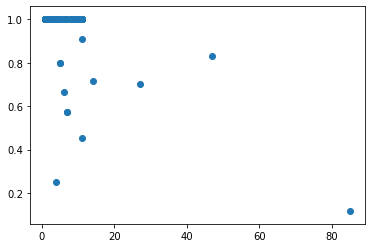

In [84]:
lives = np.array(list(graph_life[i].values()))
plt.scatter(lives[:,1], lives[:,0])

In [85]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans.fit(lives)
kmeans.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0])